#                                             COMPUTING ASSIGNMENT - 3

In this assignment, we aim to explore the concept of Convolutional Neural Networks (CNNs) and their suitability for image classification tasks. We will understand the significance of automatic feature learning in image classification and how CNNs excel in utilizing spatial relationships within images.
To Do:
    a. You will have to to successfully run this notebook and understand the steps. 
    b. Make any modifications/additions to demonstrate that the model trained correctly, by using an image from the 'Test' dataset and verify that it was correctly classified.
    c. Take an image of a your own handwritten digit (possibly in a 5cm x 5cm sheet) and verify if the model is able to classify it correctly. If it fails, justify the reason.
    d. Take images of a specific digit, one from the 'train' and 'test' set. Extract the SIFT features for these digits. Compare them using their SIFT features and verify if they match. Justify.
    e. Create a copy of this notebook and now use the CIFAR10 dataset and modify the template (keep the basic model same as 'Sequential', but can make other changes) as necessary to perform classification on this dataset. Show that the trained model is able to classify the objects from the given 'Train' set. Does it work for your own image (not necessarily in the dataset) ?

by Shubhhi Singh (210070084) and Maalavika CS (210070050)

### A basic CNN architecture

CNNs are a class of deep learning models designed to automatically and adaptively learn spatial hierarchies of features from input data, particularly images. They are characterized by their ability to learn directly from pixel data with minimal preprocessing. A CNN employs spatial convolution for processing. This operation calculates a sum of products between pixel values and a set of kernel weights, applied at each spatial location in the input image. The result at each location is a scalar value, analogous to the output of a neuron in a fully connected neural network. Adding a bias and applying an activation function completes the analogy with fully connected networks.

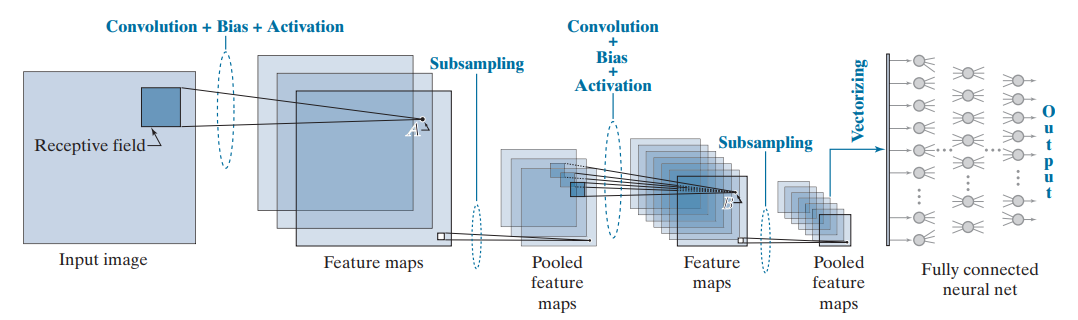

A typical CNN architecture consists of several layers:

Convolutional Layer: These layers apply convolution operations to the input data, which involves sliding a small filter (kernel) over the input to detect patterns and features.

Pooling Layer: Pooling layers reduce the spatial dimensions of the input by taking the maximum or average value within a small window. This helps reduce the computational load and focuses on the most important features.

Fully Connected Layer (Dense Layer): These layers are traditional neural network layers that take the output of the previous layers and produce the final classification or regression output.

### Visualizing feature maps after convolution and pooling operations

We will try to visualize the features in each layer of a CNN using the MNIST dataset

In [1]:
#make sure libraries like TensorFlow, Keras, NumPy, and Matplotlib are installed
#if not, uncomment the following line
#pip install tensorflow keras numpy matplotlib

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import cv2

2023-11-28 21:14:01.492338: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-28 21:14:01.530704: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-28 21:14:01.691899: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-28 21:14:01.692079: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-28 21:14:01.693420: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

Next, we load the MNIST dataset and view a few samples from it

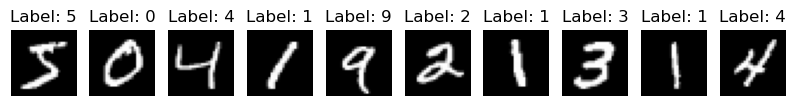

In [2]:
#Loading the MNIST dataset and preprocess it
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


#Display a few sample images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

Now, let us visualize how convolution and pooling operations affect the sizes and structure of feature maps. We load an image, create a 5x5 receptive field (convolution kernel), and perform convolution on the image. After convolution, we apply max-pooling with a 2x2 neighborhood to obtain the pooled feature map

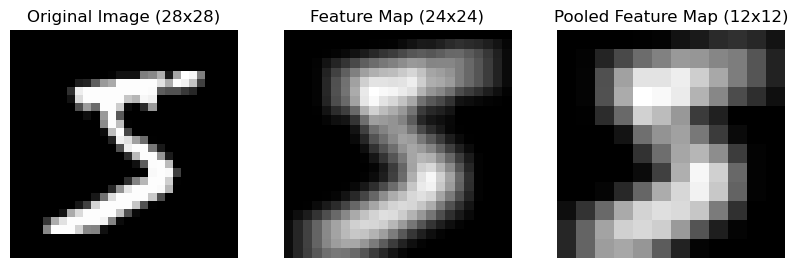

In [3]:
image = x_train[0]

#Create a random 5x5 receptive field 
receptive_field = np.random.rand(5, 5)

feature_map = np.zeros((24, 24))  # Output feature map size after convolution (28-5+1)x(28-5+1)

for i in range(24):
    for j in range(24): 
        feature_map[i, j] = np.sum(image[i:i+5, j:j+5] * receptive_field) #Perform convolution

#Perform max-pooling with a 2x2 neighborhood
pooled_feature_map = np.zeros((12, 12))

for i in range(0, 24, 2):
    for j in range(0, 24, 2):
        pooled_feature_map[i//2, j//2] = np.max(feature_map[i:i+2, j:j+2])

#Visualize the image, feature map, and pooled feature map
plt.figure(figsize=(10, 4))

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title("Original Image (28x28)")
plt.axis('off')

plt.subplot(132)
plt.imshow(feature_map, cmap='gray')
plt.title("Feature Map (24x24)")
plt.axis('off')

plt.subplot(133)
plt.imshow(pooled_feature_map, cmap='gray')
plt.title("Pooled Feature Map (12x12)")
plt.axis('off')

plt.show()


Let us visualize how an input image propagates through the CNN and visualize the feature maps at different layers of the network. To do so, we create a simple CNN model with 2 convolutional layers and pooling.

1/1 [==============================] - 0s 100ms/step


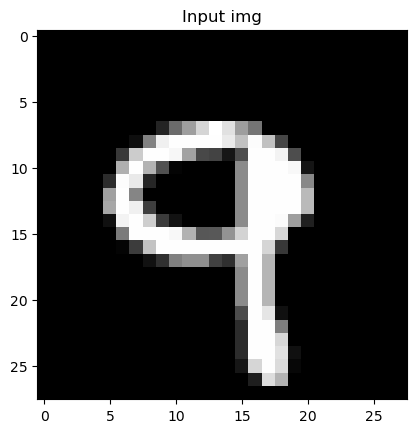

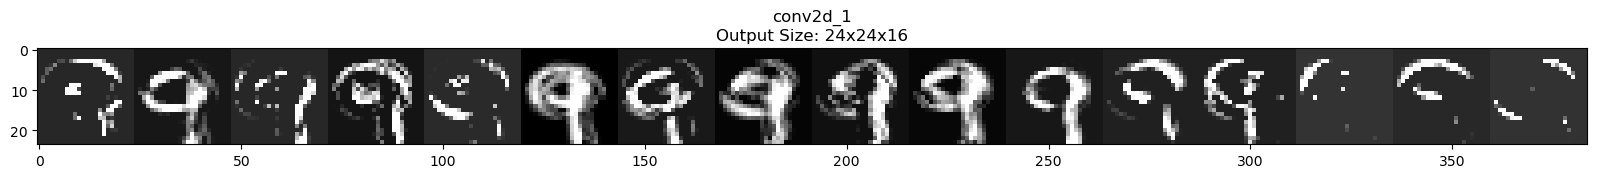

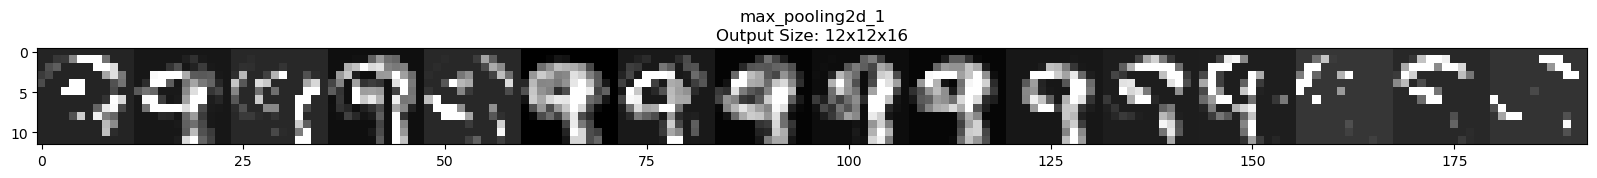

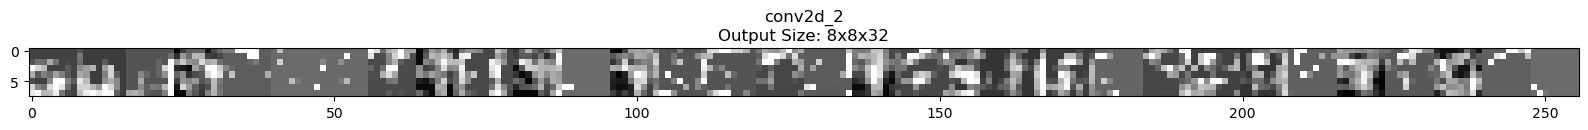

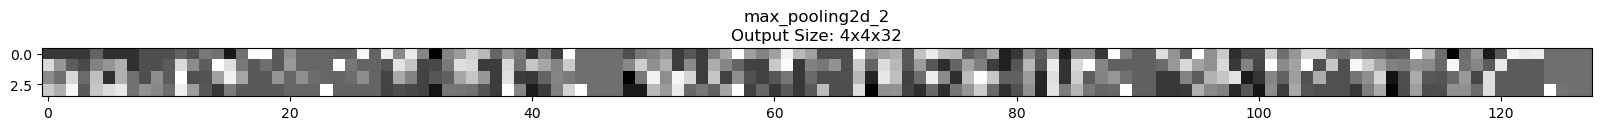

In [4]:
import tensorflow as tf
#Select a random MNIST image from the training set
random_index = np.random.randint(0, len(x_train))
img = x_train[random_index]
plt.title('Input img')
plt.imshow(img,cmap='gray')

#Create a simple CNN model with two convolutional layers and pooling
model = Sequential()
model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(28, 28, 1))) #16 kernels, 5x5 each
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (5, 5), activation='relu'))                          #32 kernels, 5x5 each
model.add(MaxPooling2D((2, 2)))


img = img.reshape((28, 28, 1))  # Add the channel dimension
img = img / 255.0  # Normalize the pixel values to [0, 1]
img = np.expand_dims(img, axis=0)  # Add the batch dimension

#Create a model to visualize feature maps
layer_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.Model(inputs=model.input, outputs=layer_outputs)

# Get the feature maps for the example image
feature_maps = visualization_model.predict(img)

# Visualize the feature maps
layer_names = ['conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2']

# Iterate through each layer and its corresponding feature maps
for layer_name, feature_map in zip(layer_names, feature_maps):
    # Get the number of feature maps in the current layer
    n_features = feature_map.shape[-1]
    
    # Get the size of each feature map (assuming they are square)
    size = feature_map.shape[1]
    
    # Create an empty grid to display all feature maps in this layer
    display_grid = np.zeros((size, size * n_features))
    
    
    
    # Iterate through each feature map in the current layer
    for i in range(n_features):
        # Extract the current feature map
        x = feature_map[0, :, :, i]
        
        # Normalize the values for better visualization
        x -= x.mean()  # Subtract the mean value to center around 0
        x /= x.std()  # Divide by standard deviation for scaling
        x *= 64  # Scale values for better visibility
        x += 128  # Shift values to be within the [0, 255] range
        x = np.clip(x, 0, 255).astype('uint8')  # Clip values to the [0, 255] range
        
        # Add the current feature map to the display grid
        display_grid[:, i * size: (i + 1) * size] = x
    
    # Set the scale for displaying the grid
    scale = 20. / n_features
    
    # Create a new figure to display the feature maps for this layer
    plt.figure(figsize=(scale * n_features, scale))
    
    # Set the title for this layer, along with input and output size
    plt.title(f'{layer_name}\nOutput Size: {size}x{size}x{n_features}')
    
    # Remove grid lines for a cleaner visualization
    plt.grid(False)
    
    # Display the feature maps in the current layer using the viridis colormap
    plt.imshow(display_grid, aspect='auto', cmap='gray')

# Show all the visualizations
plt.show()




### Training a CNN

We add fully connected dense layers to the above model after flattening the feature maps. These dense layers will learn to classify the digit images after the convolutional and pooling layers extract features.

We one-hot encode the labels, preparing them for categorical cross-entropy loss during training. Next, the model is compiled with the Adam optimizer, categorical cross-entropy loss, and accuracy as the evaluation metric.

The model is trained on the training set for 5 epochs with a batch size of 128.

We plot the training history, including training and validation loss, and training and validation accuracy, to visualize how these metrics change over time.

Epoch 1/5
469/469 [==============================] - 6s 13ms/step - loss: 0.2696 - accuracy: 0.9231 - val_loss: 0.0714 - val_accuracy: 0.9766
Epoch 2/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0715 - accuracy: 0.9781 - val_loss: 0.0487 - val_accuracy: 0.9846
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0505 - accuracy: 0.9848 - val_loss: 0.0385 - val_accuracy: 0.9865
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0390 - accuracy: 0.9879 - val_loss: 0.0342 - val_accuracy: 0.9889
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0322 - accuracy: 0.9898 - val_loss: 0.0379 - val_accuracy: 0.9878


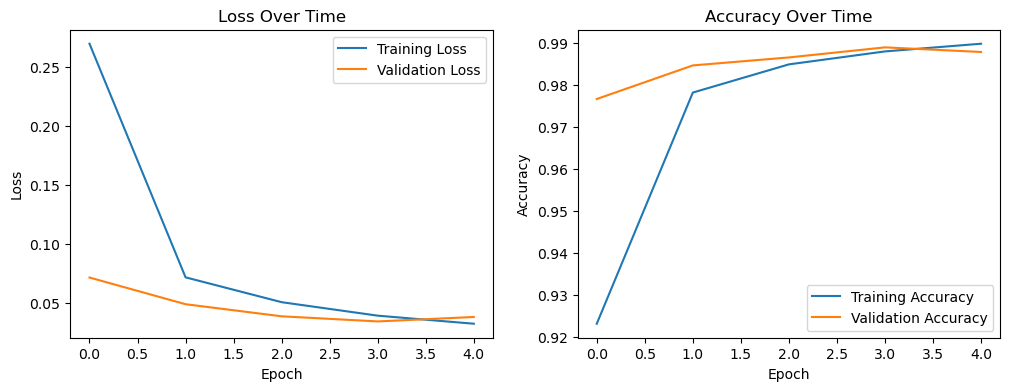

313/313 [==============================] - 0s 1ms/step - loss: 0.0379 - accuracy: 0.9878
Test Loss: 0.0379
Test Accuracy: 98.78%
313/313 [==============================] - 0s 1ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.97      1.00      0.99      1032
           3       0.98      1.00      0.99      1010
           4       1.00      0.97      0.98       982
           5       1.00      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       1.00      0.97      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Confusion Matrix:
 [[ 972    0   

In [5]:
#Flatten the feature maps and add fully connected dense layers
model.add(Flatten())
# model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

#encode the labels(one-hot)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


#Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

#Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128)

#Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Time')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Time')

plt.show()

#Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

#Generate predictions
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

#Generate classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test_labels, y_pred_labels))
print("Confusion Matrix:\n", confusion_matrix(y_test_labels, y_pred_labels))

The performance analysis on each digit class for both the training and test sets reveals a crucial aspect: the CNN achieved similar accuracy on both datasets. This indicates a successful training process and robust generalization to unseen digits. The network's ability to perform well on the test set demonstrates that it didn't overfit the training data.

We can also view the learnt kernels after the model has been trained. These are shown for the first layer below.

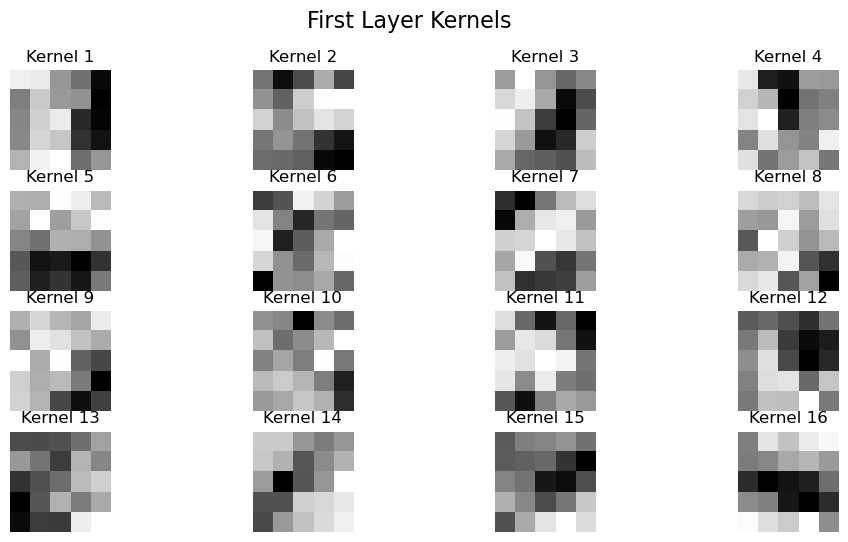

In [6]:
first_layer_weights = model.layers[0].get_weights()[0]

#Visualize the weights
plt.figure(figsize=(12, 6))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(first_layer_weights[:, :, 0, i], cmap='gray')
    plt.axis('off')
    plt.title(f'Kernel {i + 1}')

plt.suptitle('First Layer Kernels', fontsize=16)
plt.show()

Let us visualize a test image as it propagates through the trained model. 

1/1 [==============================] - 0s 53ms/step


/tmp/ipykernel_4086/808979386.py:32: RuntimeWarning: invalid value encountered in divide
  feature_map_i /= feature_map_i.std()  # Divide by standard deviation for scaling
/tmp/ipykernel_4086/808979386.py:35: RuntimeWarning: invalid value encountered in cast
  feature_map_i = np.clip(feature_map_i, 0, 255).astype('uint8')  # Clip values to the [0, 255] range


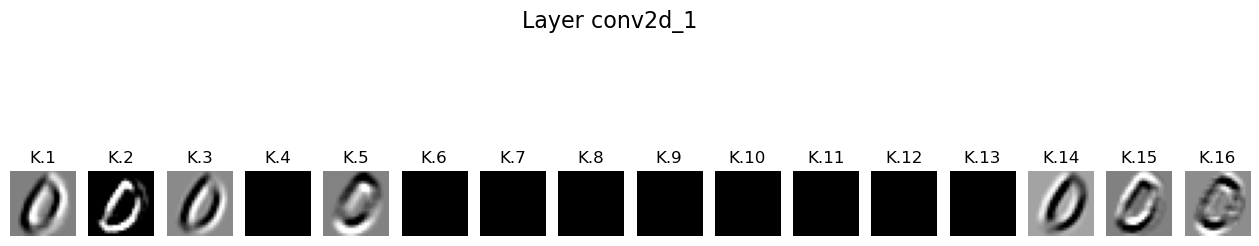

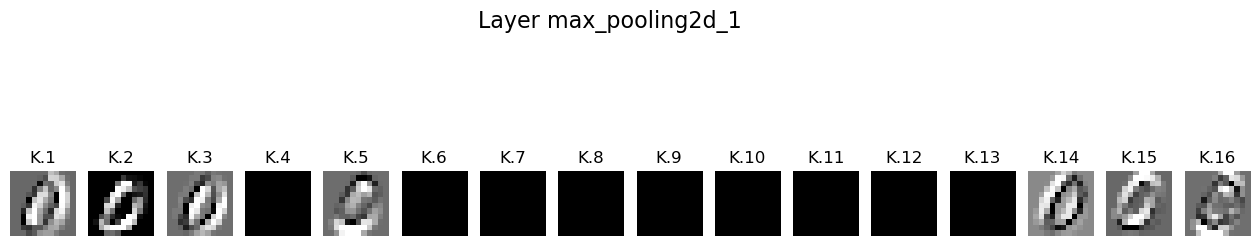

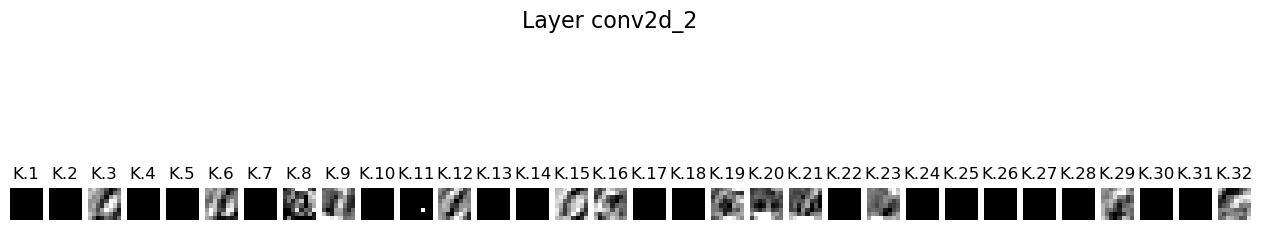

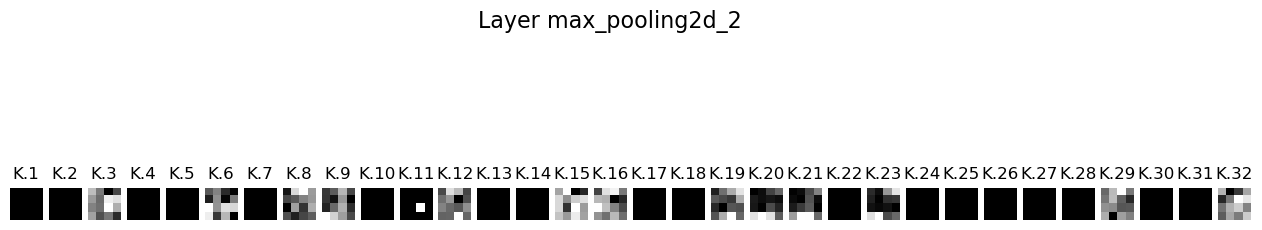

In [7]:
#Select a random MNIST image from the test set
random_index = np.random.randint(0, len(x_test))
test_image = x_test[random_index]

#Preprocess the test image for visualization
test_image = test_image / 255.0
test_image = np.expand_dims(test_image, axis=0)

#Extract the parameters from the trained model and create a visualization model with these
layer_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.Model(inputs=model.input, outputs=layer_outputs)

#Get the feature maps for the test image
feature_maps = visualization_model.predict(test_image)

#Visualize the feature maps at different layers
layer_names = ['conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2']

for layer_name, feature_map in zip(layer_names, feature_maps):
    # Get the number of feature maps in the current layer
    n_features = feature_map.shape[-1]

    # Create a new figure to display the feature maps for this layer
    plt.figure(figsize=(16, 4))

    # Visualize feature maps for each kernel in the current layer
    for i in range(n_features):
        feature_map_i = feature_map[0, :, :, i]

        # Normalize the values for better visualization
        feature_map_i -= feature_map_i.mean()  # Subtract the mean value to center around 0
        feature_map_i /= feature_map_i.std()  # Divide by standard deviation for scaling
        feature_map_i *= 64  # Scale values for better visibility
        feature_map_i += 128  # Shift values to be within the [0, 255] range
        feature_map_i = np.clip(feature_map_i, 0, 255).astype('uint8')  # Clip values to the [0, 255] range

        # Create subplots for each feature map
        plt.subplot(1, n_features, i + 1)
        plt.imshow(feature_map_i, cmap='gray')
        plt.axis('off')
        plt.title(f'K.{i + 1}')

    plt.suptitle(f'Layer {layer_name}', fontsize=16)
    plt.show()



In [8]:
# To Do - Based on the above outputs, comment on the use of the various layers 
# of the CNN model. What features do they capture ? Why ?
#
# To Do - take a specific image from the 'Train' set and 
# demonstrate that it was classificed correctly.

In [9]:
# save model
model.save('final_model.h5')

/home/shubhhi/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [10]:
from keras.models import load_model

In [11]:
# load model
model = load_model('final_model.h5')
 # evaluating model on test dataset
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 98.780


724
1/1 [==============================] - 0s 18ms/step


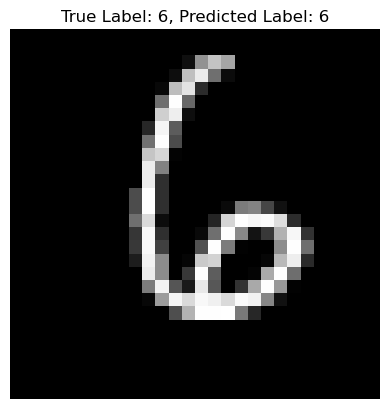

In [17]:
# Choose a random image from the test set
test_index = np.random.randint(0, len(x_test))
print(test_index)
test_img = x_test[test_index]
test_label = y_test[test_index]

# Reshape and preprocess the test image
test_img = test_img.reshape((-1, 28, 28, 1))  # Add batch dimension

# Getting the model's prediction
prediction = model.predict(test_img)
predicted_label = np.argmax(prediction)
#print(prediction)

# Display the image and the predicted label
plt.imshow(test_img.reshape(28, 28), cmap='gray')
plt.title(f"True Label: {np.argmax(test_label)}, Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()


The model is able to correctly predict on test dataset as seen above

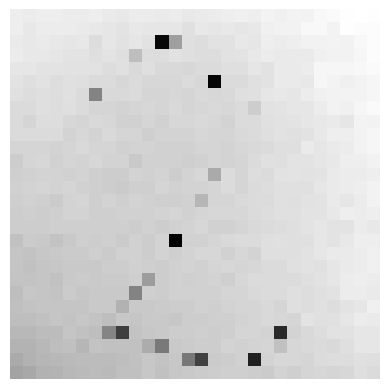

In [13]:
# Loading own image
image_path = '/home/shubhhi/Desktop/Semester5/EE610/Computing3/twon.jpeg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Resizing the image to 28x28 pixels
resized_img = cv2.resize(img, (28, 28))

# Normalizing the pixel values
normalized_img = resized_img / 255.0

# Displaying the image
plt.imshow(normalized_img, cmap='gray')
plt.axis('off')
plt.show()

# Reshaping and preprocess the image for model prediction
input_image = normalized_img.reshape((-1, 28, 28, 1))  # Add batch dimension


In [14]:
# Getting the model's prediction for own image
prediction = model.predict(input_image)
predicted_label = np.argmax(prediction)

print(f"Predicted Label: {predicted_label}")

1/1 [==============================] - 0s 23ms/step
Predicted Label: 3


The model is sometimes able to predict my own handwritten digit and at times not. This could be due to differences in the sampling done on the image and the discrepancies in feature extraction. Another reason, could be that the image is first taken through a camera and then uploaded and resampled to 28 x 28, major details regarding the digit could be lost and prediction would be erroneous.

SIFT features extraction:
A lot of features are being correctly mapped but a few points have some error.

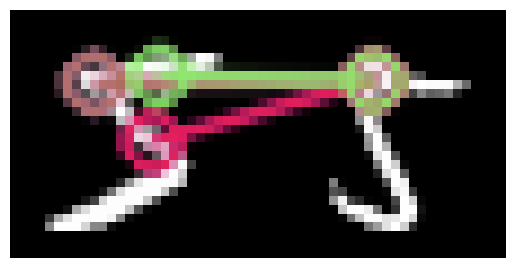

In [15]:
# Taking same digit from training and test dataset
train_index = 0 
test_index = 1406   

train_img = x_train[train_index].reshape((28, 28))  
test_img = x_test[test_index].reshape((28, 28))   

# Converting images to grayscale
train_img_gray = cv2.cvtColor((train_img * 255).astype('uint8'), cv2.COLOR_GRAY2BGR)
test_img_gray = cv2.cvtColor((test_img * 255).astype('uint8'), cv2.COLOR_GRAY2BGR)

# Initiating SIFT detector
sift = cv2.SIFT_create()

# Detecting keypoints and computing descriptors
kp_train, des_train = sift.detectAndCompute(train_img_gray, None)
kp_test, des_test = sift.detectAndCompute(test_img_gray, None)

#Using a matcher to match the descriptors
matcher = cv2.BFMatcher()
matches = matcher.match(des_train, des_test)

#Drawing matches
img_matches = cv2.drawMatches(train_img_gray, kp_train, test_img_gray, kp_test, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img_matches)
plt.axis('off')
plt.show()

plt.show()


In this Convolutional Neural Networks (CNNs), three layers are used — Conv2D, pooling, and Dense (fully connected) layers 

Conv2D Layers (Convolutional Layers): Convolutional layers perform the primary function of feature extraction. They apply kernels to input images to detect patterns and features and create a feature map.

Pooling Layers (MaxPooling2D): Pooling layers downsample the feature maps generated by convolutional layers by reducing spatial dimensions (width and height) while retaining important features. This controls overfitting and computational complexity.
Max pooling extracts the maximum value from each local region of the input feature map, reducing its size while preserving the most significant information.

Dense Layers (Fully Connected Layers):Dense layers process high-level features extracted by the convolutional and pooling layers to make predictions.
They connect every neuron in one layer to every neuron in the subsequent layer, allowing the network to learn complex relationships between features and classes and they finally provide probabilities.

In this we used 2 conv2D, 2 MaxPooling2D and 2 dense layers.